In [2]:
from google.colab import files

uploaded=files.upload()

Saving normalize_veri.csv to normalize_veri.csv


In [3]:
import pandas as pd

# Veri setini 'veri-seti.txt' dosyasından yükle
data = pd.read_csv('normalize_veri.csv')

# Veri setini incele
data.head()


,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skinfold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable (0 or 1)
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,1
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1


In [4]:
print(data.isnull().sum())

Number of times pregnant                                                    0
Plasma glucose concentration a 2 hours in an oral glucose tolerance test    0
Diastolic blood pressure (mm Hg)                                            0
Triceps skinfold thickness (mm)                                             0
2-Hour serum insulin (mu U/ml)                                              0
Body mass index (weight in kg/(height in m)^2)                              0
Diabetes pedigree function                                                  0
Age (years)                                                                 0
Class variable (0 or 1)                                                     0
dtype: int64


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [7]:
X = data.drop("Class variable (0 or 1)", axis=1)
y = data["Class variable (0 or 1)"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Eğitim Kümesi Doğruluk: 0.7467411545623837
Test Kümesi Doğruluk: 0.7056277056277056
Karışıklık Matrisi:
 [[110  41]
 [ 27  53]]

Hassasiyet: [0.80291971 0.56382979]
Özgüllük: [0.72847682 0.6625    ]
F1 Puanı: [0.76388889 0.6091954 ]
Destek: [151  80]


<ipython-input-26-ab46f560a57f>:35: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "k--" (-> linestyle='--'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', linestyle='--', label='Rastgele')


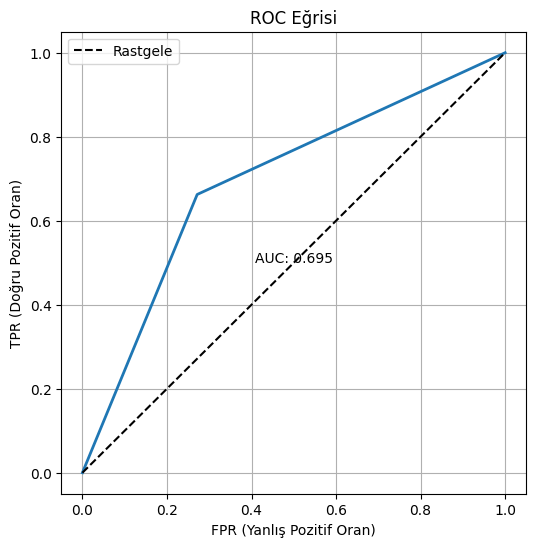

In [26]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support, roc_curve, auc
model = GaussianNB(priors=[0.5, 0.5],var_smoothing=(0.001))

model.fit(X_train, y_train)
# Eğitim kümesi üzerinde doğruluk değeri
egitim_dogruluk = model.score(X_train, y_train)
print("Eğitim Kümesi Doğruluk:", egitim_dogruluk)

# Test kümesi üzerinde doğruluk değeri
test_dogruluk = model.score(X_test, y_test)
print("Test Kümesi Doğruluk:", test_dogruluk)

# Karışıklık Matrisi

tahminler = model.predict(X_test)
cm = confusion_matrix(y_test, tahminler)
print("Karışıklık Matrisi:\n", cm)
# Hassasiyet, özgüllük, F1 puanı ve desteklerin hesaplanması
precision, recall, fscore, support = precision_recall_fscore_support(y_test, tahminler)

# Hesaplanan metriklerin yazdırılması
print("\nHassasiyet:", precision)
print("Özgüllük:", recall)
print("F1 Puanı:", fscore)
print("Destek:", support)
# FPR ve TPR değerlerinin hesaplanması
fpr, tpr, thresholds = roc_curve(y_test, tahminler)

# ROC eğrisinin çizilmesi
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, linewidth=2)


plt.plot([0, 1], [0, 1], 'k--', linestyle='--', label='Rastgele')

# Alan Hesaplama (AUC)
auc_score = auc(fpr, tpr)
plt.text(0.5, 0.5, f"AUC: {auc_score:.3f}", ha="center")

# Grafik başlığı ve eksen isimleri
plt.title("ROC Eğrisi")
plt.xlabel("FPR (Yanlış Pozitif Oran)")
plt.ylabel("TPR (Doğru Pozitif Oran)")


plt.legend()

# Grafik gösterimi
plt.grid(True)
plt.show()





Hassasiyet: [0.80291971 0.56382979]
Özgüllük: [0.72847682 0.6625    ]
F1 Puanı: [0.76388889 0.6091954 ]
Destek: [151  80]
Eğitim Kümesi Doğruluk: 0.7597765363128491
Test Kümesi Doğruluk: 0.7619047619047619
Karışıklık Matrisi:
 [[131  20]
 [ 35  45]]

Hassasiyet: [0.78915663 0.69230769]
Özgüllük: [0.86754967 0.5625    ]
F1 Puanı: [0.82649842 0.62068966]
Destek: [151  80]


<ipython-input-27-5cb9002899c7>:43: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "k--" (-> linestyle='--'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', linestyle='--', label='Rastgele')


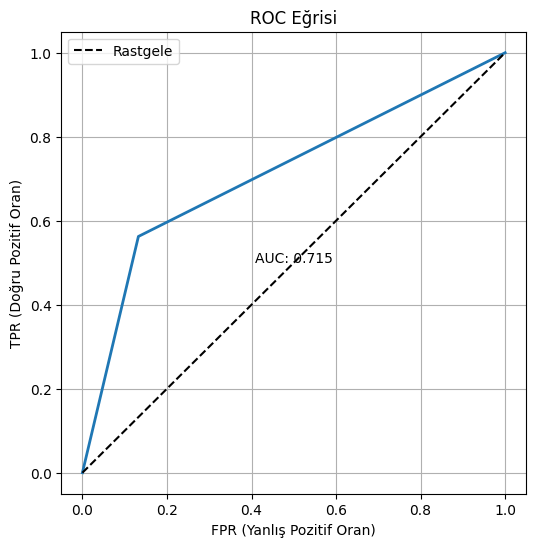

In [27]:
# Hassasiyet, özgüllük, F1 puanı ve desteklerin hesaplanması
precision, recall, fscore, support = precision_recall_fscore_support(y_test, tahminler)

# Hesaplanan metriklerin yazdırılması
print("\nHassasiyet:", precision)
print("Özgüllük:", recall)
print("F1 Puanı:", fscore)
print("Destek:", support)
import numpy as np
model = GaussianNB(priors=[0.8, 0.2],var_smoothing=(0.0001))

model.fit(X_train, y_train)
# Eğitim kümesi üzerinde doğruluk değeri
egitim_dogruluk = model.score(X_train, y_train)
print("Eğitim Kümesi Doğruluk:", egitim_dogruluk)

# Test kümesi üzerinde doğruluk değeri
test_dogruluk = model.score(X_test, y_test)
print("Test Kümesi Doğruluk:", test_dogruluk)

# Karışıklık Matrisi
from sklearn.metrics import confusion_matrix

tahminler = model.predict(X_test)
cm = confusion_matrix(y_test, tahminler)
print("Karışıklık Matrisi:\n", cm)
# Hassasiyet, özgüllük, F1 puanı ve desteklerin hesaplanması
precision, recall, fscore, support = precision_recall_fscore_support(y_test, tahminler)

# Hesaplanan metriklerin yazdırılması
print("\nHassasiyet:", precision)
print("Özgüllük:", recall)
print("F1 Puanı:", fscore)
print("Destek:", support)
# FPR ve TPR değerlerinin hesaplanması
fpr, tpr, thresholds = roc_curve(y_test, tahminler)

# ROC eğrisinin çizilmesi
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, linewidth=2)

# Diyagonal çizgi ekleme (rastgele sınıflandırıcıyı temsil eder)
plt.plot([0, 1], [0, 1], 'k--', linestyle='--', label='Rastgele')

# Alan Hesaplama (AUC)
auc_score = auc(fpr, tpr)
plt.text(0.5, 0.5, f"AUC: {auc_score:.3f}", ha="center")

# Grafik başlığı ve eksen isimleri
plt.title("ROC Eğrisi")
plt.xlabel("FPR (Yanlış Pozitif Oran)")
plt.ylabel("TPR (Doğru Pozitif Oran)")

# Efsane (legend) ekleme
plt.legend()

# Grafik gösterimi
plt.grid(True)
plt.show()


In [10]:
from sklearn.neighbors import KNeighborsClassifier
k_degerleri = range(1, 21)
en_iyi_dogruluk = -float("inf")
en_iyi_k = None

for k in k_degerleri:
    # Modelin oluşturulması
    model = KNeighborsClassifier(n_neighbors=k)

    # Modelin eğitilmesi
    model.fit(X_train, y_train)

    # Test kümesi üzerinde doğruluk değeri
    test_dogruluk = model.score(X_test, y_test)
    print(f"{k}. k değeri doğruluk değeri {test_dogruluk}")
    # En iyi k'yi ve doğruluğu kaydetme
    if test_dogruluk > en_iyi_dogruluk:
        en_iyi_dogruluk = test_dogruluk
        en_iyi_k = k

print("En İyi Doğruluk:", en_iyi_dogruluk)
print("En İyi k değeri:", en_iyi_k)


1. k değeri doğruluk değeri 0.6753246753246753
2. k değeri doğruluk değeri 0.6796536796536796
3. k değeri doğruluk değeri 0.6926406926406926
4. k değeri doğruluk değeri 0.696969696969697
5. k değeri doğruluk değeri 0.6796536796536796
6. k değeri doğruluk değeri 0.6666666666666666
7. k değeri doğruluk değeri 0.7142857142857143
8. k değeri doğruluk değeri 0.696969696969697
9. k değeri doğruluk değeri 0.7229437229437229
10. k değeri doğruluk değeri 0.7056277056277056
11. k değeri doğruluk değeri 0.7012987012987013
12. k değeri doğruluk değeri 0.6883116883116883
13. k değeri doğruluk değeri 0.6926406926406926
14. k değeri doğruluk değeri 0.6883116883116883
15. k değeri doğruluk değeri 0.70995670995671
16. k değeri doğruluk değeri 0.7142857142857143
17. k değeri doğruluk değeri 0.7272727272727273
18. k değeri doğruluk değeri 0.7142857142857143
19. k değeri doğruluk değeri 0.7186147186147186
20. k değeri doğruluk değeri 0.7229437229437229
En İyi Doğruluk: 0.7272727272727273
En İyi k değeri: 

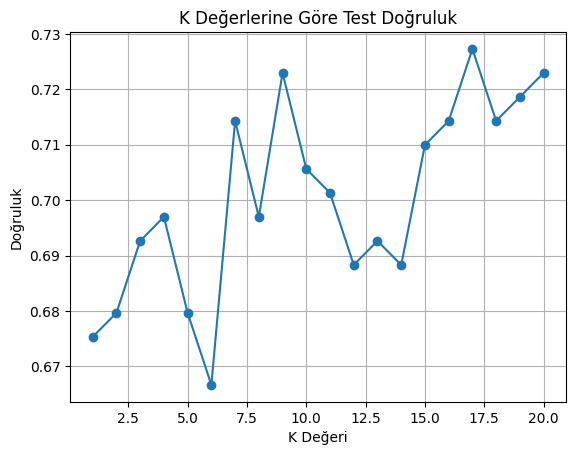

In [11]:
import matplotlib.pyplot as plt

# K değerleri listesi
k_degerleri_liste = list(k_degerleri)

# Doğruluk değerleri listesi
dogruluk_degerleri_liste = []

for k in k_degerleri:
    # Her k değeri için test doğruluğunu hesaplama
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    test_dogruluk = model.score(X_test, y_test)
    dogruluk_degerleri_liste.append(test_dogruluk)

# Grafik oluşturma
plt.plot(k_degerleri_liste, dogruluk_degerleri_liste, marker='o', linestyle='-')
plt.title("K Değerlerine Göre Test Doğruluk")
plt.xlabel("K Değeri")
plt.ylabel("Doğruluk")
plt.grid(True)
plt.show()


Test Doğruluk: 0.7272727272727273
Test Hassasiyeti: 0.6440677966101694
Test Özgüllüğü: 0.475
Karışıklık Matrisi:
 [[130  21]
 [ 42  38]]
Test Doğruluk: 0.7272727272727273
Test Hassasiyeti: 0.6440677966101694
Test Özgüllüğü: 0.475

F1 Puanı: [0.80495356 0.54676259]
Destek: [151  80]

Karışıklık Matrisi:
 [[130  21]
 [ 42  38]]


<ipython-input-37-789342e2acf8>:57: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "k--" (-> linestyle='--'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', linestyle='--', label='Rastgele')


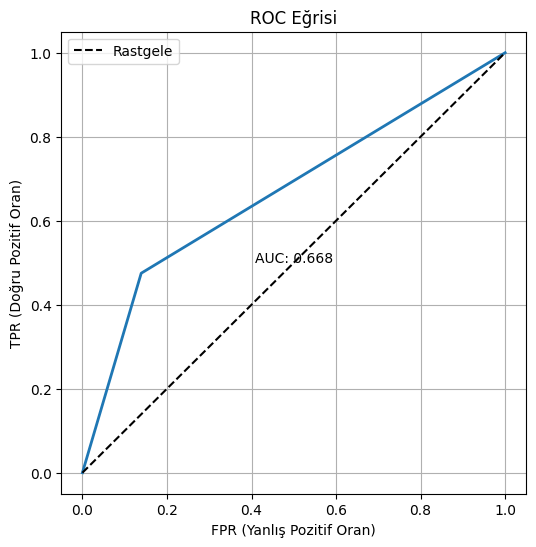

In [37]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_curve, auc

# En iyi k değeri ile modelin oluşturulması
en_iyi_model = KNeighborsClassifier(n_neighbors=en_iyi_k)
en_iyi_model.fit(X_train, y_train)

# Test kümesi üzerinde doğruluk, hassasiyet ve özgüllük gibi metrikleri hesaplama


tahminler = en_iyi_model.predict(X_test)

dogruluk = accuracy_score(y_test, tahminler)
hassasiyet = precision_score(y_test, tahminler)
özgüllük = recall_score(y_test, tahminler)

print("Test Doğruluk:", dogruluk)
print("Test Hassasiyeti:", hassasiyet)
print("Test Özgüllüğü:", özgüllük)

# Karışıklık Matrisi
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, tahminler)
print("Karışıklık Matrisi:\n", cm)

# Tahminlerin yapılması
tahminler = en_iyi_model.predict(X_test)

# Doğruluk, hassasiyet ve özgüllük gibi metriklerin hesaplanması
dogruluk = accuracy_score(y_test, tahminler)
hassasiyet = precision_score(y_test, tahminler)
özgüllük = recall_score(y_test, tahminler)

# F1 puanı ve desteklerin hesaplanması
# precision, recall, fscore, support = fscore_support(y_test, tahminler)
precision, recall, fscore, support = precision_recall_fscore_support(y_test, tahminler)

# Hesaplanan metriklerin yazdırılması
print("Test Doğruluk:", dogruluk)
print("Test Hassasiyeti:", hassasiyet)
print("Test Özgüllüğü:", özgüllük)
print("\nF1 Puanı:", fscore)
print("Destek:", support)

# Karışıklık Matrisi
cm = confusion_matrix(y_test, tahminler)
print("\nKarışıklık Matrisi:\n", cm)

# ROC Eğrisi Oluşturma
fpr, tpr, thresholds = roc_curve(y_test, tahminler)

# ROC eğrisinin çizilmesi
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, linewidth=2)

# Diyagonal çizgi ekleme (rastgele sınıflandırıcıyı temsil eder)
plt.plot([0, 1], [0, 1], 'k--', linestyle='--', label='Rastgele')

# Alan Hesaplama (AUC)
auc_score = auc(fpr, tpr)
plt.text(0.5, 0.5, f"AUC: {auc_score:.3f}", ha="center")

# Grafik başlığı ve eksen isimleri
plt.title("ROC Eğrisi")
plt.xlabel("FPR (Yanlış Pozitif Oran)")
plt.ylabel("TPR (Doğru Pozitif Oran)")

# Efsane (legend) ekleme
plt.legend()

# Grafik gösterimi
plt.grid(True)
plt.show()


MLP Eğitim Doğruluk: 0.6499068901303539
MLP Test Doğruluk: 0.6536796536796536

MLP Test Doğruluk: 0.6536796536796536
MLP Test Hassasiyeti: 0.0
MLP Test Özgüllüğü: 0.0

F1 Puanı: [0.79057592 0.        ]
Destek: [151  80]

MLP Karışıklık Matrisi:
 [[151   0]
 [ 80   0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
<ipython-input-40-44b429a4b54a>:48: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "k--" (-> linestyle='--'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', linestyle='--', label='Rastgele')


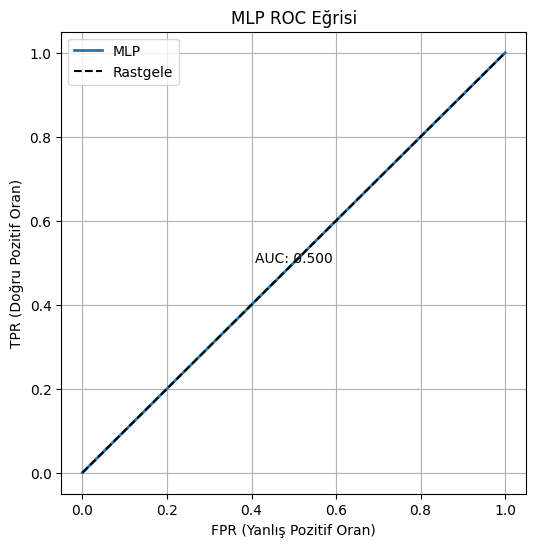

In [40]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Modelin oluşturulması
model_mlp = MLPClassifier(activation="logistic", solver="sgd", random_state=42)

# Modelin eğitilmesi
model_mlp.fit(X_train, y_train)

# Eğitim ve test kümeleri üzerinde doğruluk değerleri
egitim_dogruluk_mlp3 = model_mlp.score(X_train, y_train)
test_dogruluk_mlp3 = model_mlp.score(X_test, y_test)

print("MLP Eğitim Doğruluk:", egitim_dogruluk_mlp3)
print("MLP Test Doğruluk:", test_dogruluk_mlp3)

# Tahminlerin yapılması
tahminler_mlp = model_mlp.predict(X_test)

# Doğruluk, hassasiyet ve özgüllük gibi metriklerin hesaplanması
dogruluk_mlp = accuracy_score(y_test, tahminler_mlp)
hassasiyet_mlp = precision_score(y_test, tahminler_mlp)
özgüllük_mlp = recall_score(y_test, tahminler_mlp)

# F1 puanı ve desteklerin hesaplanması
precision_mlp, recall_mlp, fscore_mlp, support_mlp = precision_recall_fscore_support(y_test, tahminler_mlp)

# Hesaplanan metriklerin yazdırılması
print("\nMLP Test Doğruluk:", dogruluk_mlp)
print("MLP Test Hassasiyeti:", hassasiyet_mlp)
print("MLP Test Özgüllüğü:", özgüllük_mlp)
print("\nF1 Puanı:", fscore_mlp)
print("Destek:", support_mlp)

# Karışıklık Matrisi
cm_mlp = confusion_matrix(y_test, tahminler_mlp)
print("\nMLP Karışıklık Matrisi:\n", cm_mlp)

# ROC Eğrisi Oluşturma
fpr_mlp, tpr_mlp, thresholds_mlp = roc_curve(y_test, tahminler_mlp)

# ROC eğrisinin çizilmesi
plt.figure(figsize=(6, 6))
plt.plot(fpr_mlp, tpr_mlp, linewidth=2, label='MLP')

# Diyagonal çizgi ekleme (rastgele sınıflandırıcıyı temsil eder)
plt.plot([0, 1], [0, 1], 'k--', linestyle='--', label='Rastgele')

# Alan Hesaplama (AUC)
auc_score_mlp = auc(fpr_mlp, tpr_mlp)
plt.text(0.5, 0.5, f"AUC: {auc_score_mlp:.3f}", ha="center")

# Grafik başlığı ve eksen isimleri
plt.title("MLP ROC Eğrisi")
plt.xlabel("FPR (Yanlış Pozitif Oran)")
plt.ylabel("TPR (Doğru Pozitif Oran)")

# Efsane (legend) ekleme
plt.legend()

# Grafik gösterimi
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP Eğitim Doğruluk: 0.7895716945996276
MLP Test Doğruluk: 0.7619047619047619

MLP Test Doğruluk: 0.7619047619047619
MLP Test Hassasiyeti: 0.6666666666666666
MLP Test Özgüllüğü: 0.625

F1 Puanı: [0.82084691 0.64516129]
Destek: [151  80]

MLP Karışıklık Matrisi:
 [[126  25]
 [ 30  50]]


<ipython-input-41-76ea1e3bd80f>:43: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "k--" (-> linestyle='--'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', linestyle='--', label='Rastgele')


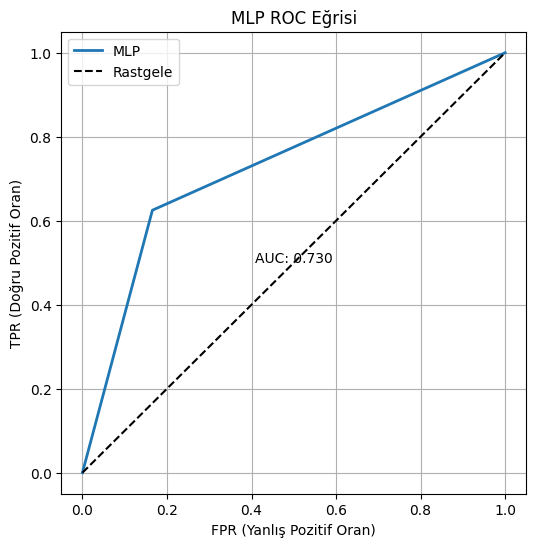

In [41]:
from sklearn.neural_network import MLPClassifier
# Modelin oluşturulması
model_mlp = MLPClassifier(activation="relu",solver="adam",random_state=42)

# Modelin eğitilmesi
model_mlp.fit(X_train, y_train)
# Eğitim ve test kümeleri üzerinde doğruluk değerleri
egitim_dogruluk_mlp1 = model_mlp.score(X_train, y_train)
test_dogruluk_mlp1 = model_mlp.score(X_test, y_test)

print("MLP Eğitim Doğruluk:", egitim_dogruluk_mlp1)
print("MLP Test Doğruluk:", test_dogruluk_mlp1)

tahminler_mlp = model_mlp.predict(X_test)

# Doğruluk, hassasiyet ve özgüllük gibi metriklerin hesaplanması
dogruluk_mlp = accuracy_score(y_test, tahminler_mlp)
hassasiyet_mlp = precision_score(y_test, tahminler_mlp)
özgüllük_mlp = recall_score(y_test, tahminler_mlp)

# F1 puanı ve desteklerin hesaplanması
precision_mlp, recall_mlp, fscore_mlp, support_mlp = precision_recall_fscore_support(y_test, tahminler_mlp)

# Hesaplanan metriklerin yazdırılması
print("\nMLP Test Doğruluk:", dogruluk_mlp)
print("MLP Test Hassasiyeti:", hassasiyet_mlp)
print("MLP Test Özgüllüğü:", özgüllük_mlp)
print("\nF1 Puanı:", fscore_mlp)
print("Destek:", support_mlp)

# Karışıklık Matrisi
cm_mlp = confusion_matrix(y_test, tahminler_mlp)
print("\nMLP Karışıklık Matrisi:\n", cm_mlp)

# ROC Eğrisi Oluşturma
fpr_mlp, tpr_mlp, thresholds_mlp = roc_curve(y_test, tahminler_mlp)

# ROC eğrisinin çizilmesi
plt.figure(figsize=(6, 6))
plt.plot(fpr_mlp, tpr_mlp, linewidth=2, label='MLP')

# Diyagonal çizgi ekleme (rastgele sınıflandırıcıyı temsil eder)
plt.plot([0, 1], [0, 1], 'k--', linestyle='--', label='Rastgele')

# Alan Hesaplama (AUC)
auc_score_mlp = auc(fpr_mlp, tpr_mlp)
plt.text(0.5, 0.5, f"AUC: {auc_score_mlp:.3f}", ha="center")

# Grafik başlığı ve eksen isimleri
plt.title("MLP ROC Eğrisi")
plt.xlabel("FPR (Yanlış Pozitif Oran)")
plt.ylabel("TPR (Doğru Pozitif Oran)")

# Efsane (legend) ekleme
plt.legend()

# Grafik gösterimi
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
<ipython-input-42-ab8f38cf87a2>:43: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "k--" (-> linestyle='--'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', linestyle='--', label='Rastgele')


MLP Eğitim Doğruluk: 0.8733705772811918
MLP Test Doğruluk: 0.7229437229437229

MLP Test Doğruluk: 0.7229437229437229
MLP Test Hassasiyeti: 0.6025641025641025
MLP Test Özgüllüğü: 0.5875

F1 Puanı: [0.78947368 0.59493671]
Destek: [151  80]

MLP Karışıklık Matrisi:
 [[120  31]
 [ 33  47]]


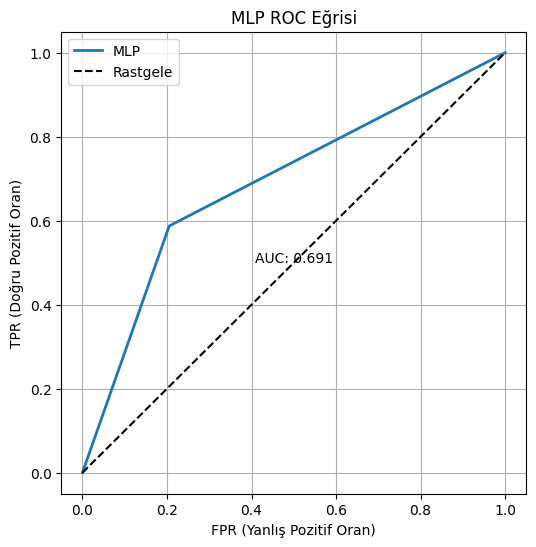

In [42]:
from sklearn.neural_network import MLPClassifier
# Modelin oluşturulması
model_mlp = MLPClassifier(activation="tanh",solver="lbfgs",random_state=42)

# Modelin eğitilmesi
model_mlp.fit(X_train, y_train)
# Eğitim ve test kümeleri üzerinde doğruluk değerleri
egitim_dogruluk_mlp2 = model_mlp.score(X_train, y_train)
test_dogruluk_mlp2 = model_mlp.score(X_test, y_test)

print("MLP Eğitim Doğruluk:", egitim_dogruluk_mlp2)
print("MLP Test Doğruluk:", test_dogruluk_mlp2)

tahminler_mlp = model_mlp.predict(X_test)

# Doğruluk, hassasiyet ve özgüllük gibi metriklerin hesaplanması
dogruluk_mlp = accuracy_score(y_test, tahminler_mlp)
hassasiyet_mlp = precision_score(y_test, tahminler_mlp)
özgüllük_mlp = recall_score(y_test, tahminler_mlp)

# F1 puanı ve desteklerin hesaplanması
precision_mlp, recall_mlp, fscore_mlp, support_mlp = precision_recall_fscore_support(y_test, tahminler_mlp)

# Hesaplanan metriklerin yazdırılması
print("\nMLP Test Doğruluk:", dogruluk_mlp)
print("MLP Test Hassasiyeti:", hassasiyet_mlp)
print("MLP Test Özgüllüğü:", özgüllük_mlp)
print("\nF1 Puanı:", fscore_mlp)
print("Destek:", support_mlp)

# Karışıklık Matrisi
cm_mlp = confusion_matrix(y_test, tahminler_mlp)
print("\nMLP Karışıklık Matrisi:\n", cm_mlp)

# ROC Eğrisi Oluşturma
fpr_mlp, tpr_mlp, thresholds_mlp = roc_curve(y_test, tahminler_mlp)

# ROC eğrisinin çizilmesi
plt.figure(figsize=(6, 6))
plt.plot(fpr_mlp, tpr_mlp, linewidth=2, label='MLP')

# Diyagonal çizgi ekleme (rastgele sınıflandırıcıyı temsil eder)
plt.plot([0, 1], [0, 1], 'k--', linestyle='--', label='Rastgele')

# Alan Hesaplama (AUC)
auc_score_mlp = auc(fpr_mlp, tpr_mlp)
plt.text(0.5, 0.5, f"AUC: {auc_score_mlp:.3f}", ha="center")

# Grafik başlığı ve eksen isimleri
plt.title("MLP ROC Eğrisi")
plt.xlabel("FPR (Yanlış Pozitif Oran)")
plt.ylabel("TPR (Doğru Pozitif Oran)")

# Efsane (legend) ekleme
plt.legend()

# Grafik gösterimi
plt.grid(True)
plt.show()

SVM Eğitim Doğruluk: 0.4338919925512104
SVM Test Doğruluk: 0.4458874458874459

SVM Test Doğruluk: 0.4458874458874459
SVM Test Hassasiyeti: 0.14705882352941177
SVM Test Özgüllüğü: 0.125

F1 Puanı: [0.59235669 0.13513514]
Destek: [151  80]

SVM Karışıklık Matrisi:
 [[93 58]
 [70 10]]


<ipython-input-44-bc9ca43f2669>:48: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "k--" (-> linestyle='--'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', linestyle='--', label='Rastgele')


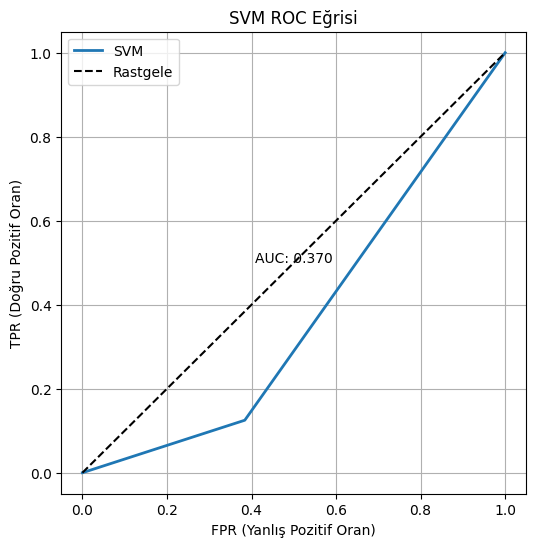

In [44]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Modelin oluşturulması
model_svm = SVC(degree=3, kernel="sigmoid", random_state=42)

# Modelin eğitilmesi
model_svm.fit(X_train, y_train)

# Eğitim ve test kümeleri üzerinde doğruluk değerleri
egitim_dogruluk_svm = model_svm.score(X_train, y_train)
test_dogruluk_svm = model_svm.score(X_test, y_test)

print("SVM Eğitim Doğruluk:", egitim_dogruluk_svm)
print("SVM Test Doğruluk:", test_dogruluk_svm)

# Tahminlerin yapılması
tahminler_svm = model_svm.predict(X_test)

# Doğruluk, hassasiyet ve özgüllük gibi metriklerin hesaplanması
dogruluk_svm = accuracy_score(y_test, tahminler_svm)
hassasiyet_svm = precision_score(y_test, tahminler_svm)
özgüllük_svm = recall_score(y_test, tahminler_svm)

# F1 puanı ve desteklerin hesaplanması
precision_svm, recall_svm, fscore_svm, support_svm = precision_recall_fscore_support(y_test, tahminler_svm)

# Hesaplanan metriklerin yazdırılması
print("\nSVM Test Doğruluk:", dogruluk_svm)
print("SVM Test Hassasiyeti:", hassasiyet_svm)
print("SVM Test Özgüllüğü:", özgüllük_svm)
print("\nF1 Puanı:", fscore_svm)
print("Destek:", support_svm)

# Karışıklık Matrisi
cm_svm = confusion_matrix(y_test, tahminler_svm)
print("\nSVM Karışıklık Matrisi:\n", cm_svm)

# ROC Eğrisi Oluşturma
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, tahminler_svm)

# ROC eğrisinin çizilmesi
plt.figure(figsize=(6, 6))
plt.plot(fpr_svm, tpr_svm, linewidth=2, label='SVM')

# Diyagonal çizgi ekleme (rastgele sınıflandırıcıyı temsil eder)
plt.plot([0, 1], [0, 1], 'k--', linestyle='--', label='Rastgele')

# Alan Hesaplama (AUC)
auc_score_svm = auc(fpr_svm, tpr_svm)
plt.text(0.5, 0.5, f"AUC: {auc_score_svm:.3f}", ha="center")

# Grafik başlığı ve eksen isimleri
plt.title("SVM ROC Eğrisi")
plt.xlabel("FPR (Yanlış Pozitif Oran)")
plt.ylabel("TPR (Doğru Pozitif Oran)")

# Efsane (legend) ekleme
plt.legend()

# Grafik gösterimi
plt.grid(True)
plt.show()


SVM Eğitim Doğruluk: 0.7783985102420856
SVM Test Doğruluk: 0.7532467532467533

SVM Test Doğruluk: 0.7532467532467533
SVM Test Hassasiyeti: 0.6619718309859155
SVM Test Özgüllüğü: 0.5875

F1 Puanı: [0.81672026 0.62251656]
Destek: [151  80]

SVM Karışıklık Matrisi:
 [[127  24]
 [ 33  47]]


<ipython-input-45-fa9561abd071>:42: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "k--" (-> linestyle='--'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', linestyle='--', label='Rastgele')


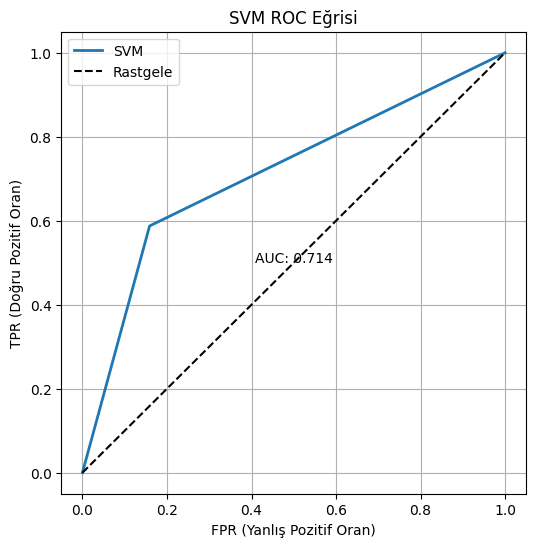

In [45]:
from sklearn.svm import SVC
# Modelin oluşturulması
model_svm = SVC(degree=2,kernel="linear",random_state=42) #linear orta  sigmoid çok kötü poly iyi #degree 10 eğitim 98 20 eğitim 1

# Modelin eğitilmesi
model_svm.fit(X_train, y_train)
# Eğitim ve test kümeleri üzerinde doğruluk değerleri
egitim_dogruluk_svm = model_svm.score(X_train, y_train)
test_dogruluk_svm = model_svm.score(X_test, y_test)

print("SVM Eğitim Doğruluk:", egitim_dogruluk_svm)
print("SVM Test Doğruluk:", test_dogruluk_svm)
tahminler_svm = model_svm.predict(X_test)

# Doğruluk, hassasiyet ve özgüllük gibi metriklerin hesaplanması
dogruluk_svm = accuracy_score(y_test, tahminler_svm)
hassasiyet_svm = precision_score(y_test, tahminler_svm)
özgüllük_svm = recall_score(y_test, tahminler_svm)

# F1 puanı ve desteklerin hesaplanması
precision_svm, recall_svm, fscore_svm, support_svm = precision_recall_fscore_support(y_test, tahminler_svm)

# Hesaplanan metriklerin yazdırılması
print("\nSVM Test Doğruluk:", dogruluk_svm)
print("SVM Test Hassasiyeti:", hassasiyet_svm)
print("SVM Test Özgüllüğü:", özgüllük_svm)
print("\nF1 Puanı:", fscore_svm)
print("Destek:", support_svm)

# Karışıklık Matrisi
cm_svm = confusion_matrix(y_test, tahminler_svm)
print("\nSVM Karışıklık Matrisi:\n", cm_svm)

# ROC Eğrisi Oluşturma
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, tahminler_svm)

# ROC eğrisinin çizilmesi
plt.figure(figsize=(6, 6))
plt.plot(fpr_svm, tpr_svm, linewidth=2, label='SVM')

# Diyagonal çizgi ekleme (rastgele sınıflandırıcıyı temsil eder)
plt.plot([0, 1], [0, 1], 'k--', linestyle='--', label='Rastgele')

# Alan Hesaplama (AUC)
auc_score_svm = auc(fpr_svm, tpr_svm)
plt.text(0.5, 0.5, f"AUC: {auc_score_svm:.3f}", ha="center")

# Grafik başlığı ve eksen isimleri
plt.title("SVM ROC Eğrisi")
plt.xlabel("FPR (Yanlış Pozitif Oran)")
plt.ylabel("TPR (Doğru Pozitif Oran)")

# Efsane (legend) ekleme
plt.legend()

# Grafik gösterimi
plt.grid(True)
plt.show()

SVM Eğitim Doğruluk: 0.8361266294227188
SVM Test Doğruluk: 0.7532467532467533

SVM Test Doğruluk: 0.7532467532467533
SVM Test Hassasiyeti: 0.6666666666666666
SVM Test Özgüllüğü: 0.575

F1 Puanı: [0.81789137 0.61744966]
Destek: [151  80]

SVM Karışıklık Matrisi:
 [[128  23]
 [ 34  46]]


<ipython-input-46-fd1ae626b24d>:42: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "k--" (-> linestyle='--'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', linestyle='--', label='Rastgele')


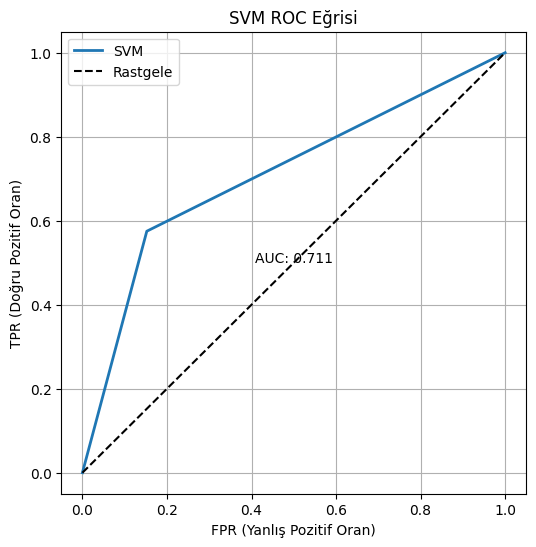

In [46]:
from sklearn.svm import SVC
# Modelin oluşturulması
model_svm = SVC(degree=4,kernel="poly",random_state=42) #linear orta  sigmoid çok kötü poly iyi #degree 10 eğitim 98 20 eğitim 1

# Modelin eğitilmesi
model_svm.fit(X_train, y_train)
# Eğitim ve test kümeleri üzerinde doğruluk değerleri
egitim_dogruluk_svm = model_svm.score(X_train, y_train)
test_dogruluk_svm = model_svm.score(X_test, y_test)

print("SVM Eğitim Doğruluk:", egitim_dogruluk_svm)
print("SVM Test Doğruluk:", test_dogruluk_svm)
tahminler_svm = model_svm.predict(X_test)

# Doğruluk, hassasiyet ve özgüllük gibi metriklerin hesaplanması
dogruluk_svm = accuracy_score(y_test, tahminler_svm)
hassasiyet_svm = precision_score(y_test, tahminler_svm)
özgüllük_svm = recall_score(y_test, tahminler_svm)

# F1 puanı ve desteklerin hesaplanması
precision_svm, recall_svm, fscore_svm, support_svm = precision_recall_fscore_support(y_test, tahminler_svm)

# Hesaplanan metriklerin yazdırılması
print("\nSVM Test Doğruluk:", dogruluk_svm)
print("SVM Test Hassasiyeti:", hassasiyet_svm)
print("SVM Test Özgüllüğü:", özgüllük_svm)
print("\nF1 Puanı:", fscore_svm)
print("Destek:", support_svm)

# Karışıklık Matrisi
cm_svm = confusion_matrix(y_test, tahminler_svm)
print("\nSVM Karışıklık Matrisi:\n", cm_svm)

# ROC Eğrisi Oluşturma
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, tahminler_svm)

# ROC eğrisinin çizilmesi
plt.figure(figsize=(6, 6))
plt.plot(fpr_svm, tpr_svm, linewidth=2, label='SVM')

# Diyagonal çizgi ekleme (rastgele sınıflandırıcıyı temsil eder)
plt.plot([0, 1], [0, 1], 'k--', linestyle='--', label='Rastgele')

# Alan Hesaplama (AUC)
auc_score_svm = auc(fpr_svm, tpr_svm)
plt.text(0.5, 0.5, f"AUC: {auc_score_svm:.3f}", ha="center")

# Grafik başlığı ve eksen isimleri
plt.title("SVM ROC Eğrisi")
plt.xlabel("FPR (Yanlış Pozitif Oran)")
plt.ylabel("TPR (Doğru Pozitif Oran)")

# Efsane (legend) ekleme
plt.legend()

# Grafik gösterimi
plt.grid(True)
plt.show()

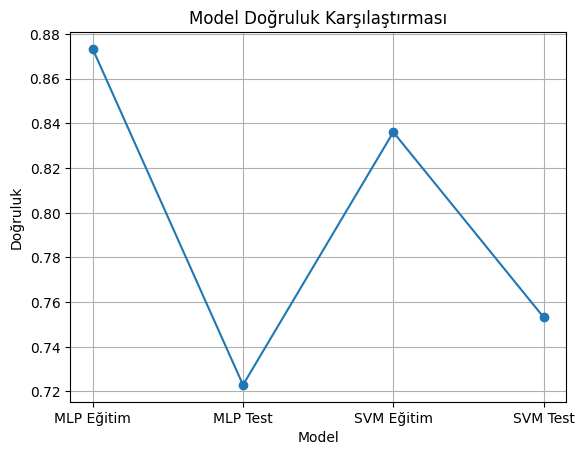

In [23]:
import matplotlib.pyplot as plt

# Eğitim ve test kümeleri üzerinde doğruluk değerleri
egitim_dogruluk_mlp = model_mlp.score(X_train, y_train)
test_dogruluk_mlp = model_mlp.score(X_test, y_test)

egitim_dogruluk_svm = model_svm.score(X_train, y_train)
test_dogruluk_svm = model_svm.score(X_test, y_test)

# Doğruluk değerlerini bir listeye kaydetme
dogruluk_degerleri = [egitim_dogruluk_mlp, test_dogruluk_mlp, egitim_dogruluk_svm, test_dogruluk_svm]



# Model isimleri
model_isimleri = ["MLP Eğitim", "MLP Test", "SVM Eğitim", "SVM Test"]

# X ekseni için model isimleri
x = model_isimleri

# Y ekseni için doğruluk değerleri
y = dogruluk_degerleri

# Grafik türü (alan grafiği)
plt.plot(x, y, marker='o', linestyle='-')

# Grafik başlığı
plt.title("Model Doğruluk Karşılaştırması")

# X ve Y eksenleri isimleri
plt.xlabel("Model")
plt.ylabel("Doğruluk")

# Grafik gösterimi
plt.grid(True)  # Alan grafiği için ızgara ekleme
plt.show()

